<a href="https://colab.research.google.com/github/Vi-Ku/NiFi/blob/master/NIFI_latest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Code for thread

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#Basic preprocessing of image

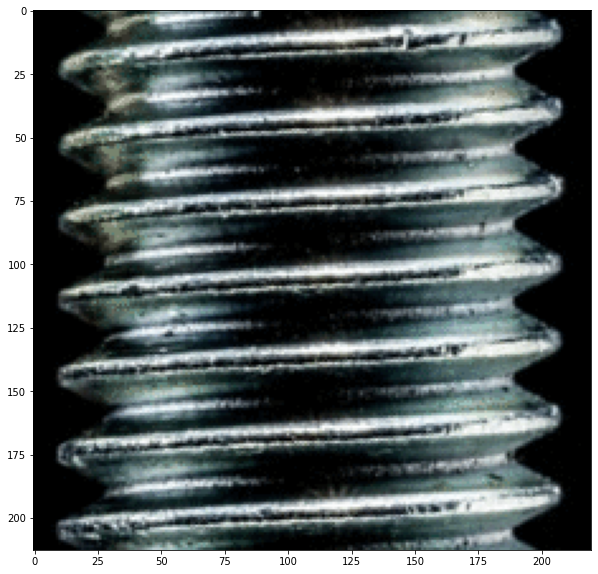

In [35]:
image = cv2.imread("/content/rsz_1imageedit_1_4966854690.png")
#Reading the image to be processed
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#convert to RGB
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
#convert to grayscale
plt.figure(figsize=(10,10))
plt.imshow(image, cmap="gray",)
plt.show()

#Detecting Lines in the image

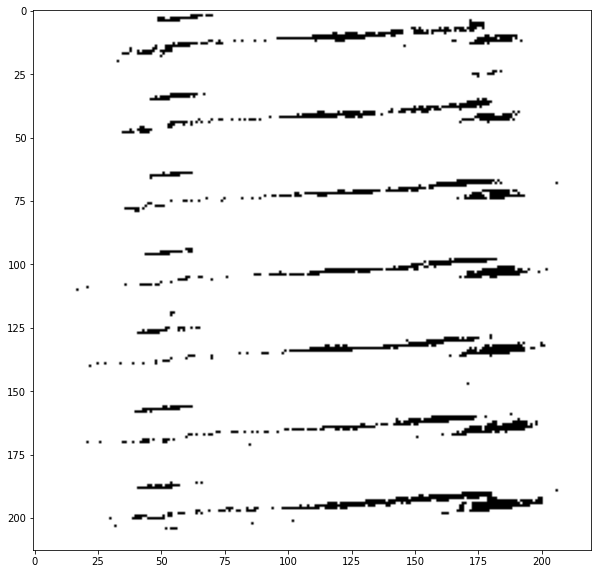

In [36]:
#converting image to binary image
_, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)
#setting the image kernel for line detection
kernel = np.ones((5,5), np.uint8)
plt.figure(figsize=(10,10))
plt.imshow(binary, cmap="gray",)
plt.show()

#Filtering the image from the output after detection of line on thread

    ##Image Erosion

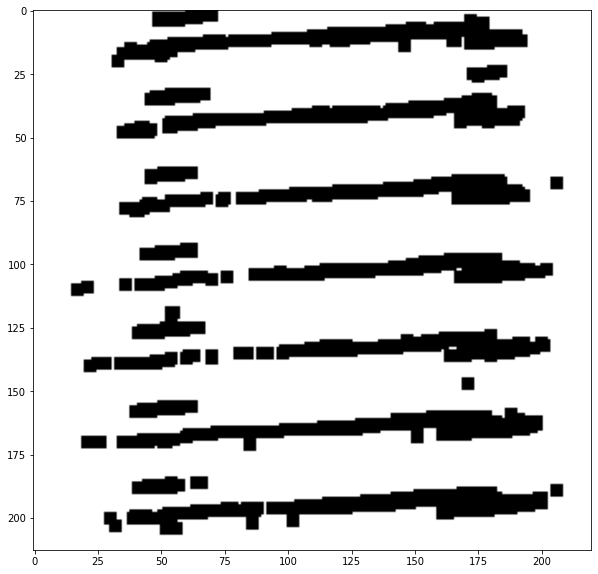

In [37]:
#Filtering the image using image erosion using an predefined kernel, so that all points on a single line are connected with each other   
binary = cv2.erode(binary, kernel, iterations=1) 
plt.figure(figsize=(10,10))
plt.imshow(binary, cmap="gray",)
plt.show()

    ##Image Dilation

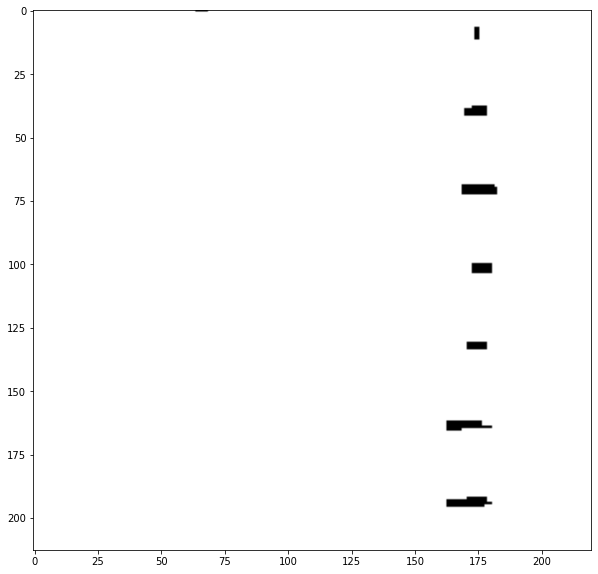

In [38]:
#finally removing the noises from the image, which are area of small pixels, so we are using image dilation for this purpose for two iteration
binary= cv2.dilate(binary, kernel, iterations=2) 
plt.figure(figsize=(10,10))
plt.imshow(binary, cmap="gray",)
plt.show()

#Detecting the position of centre pixel on this contour

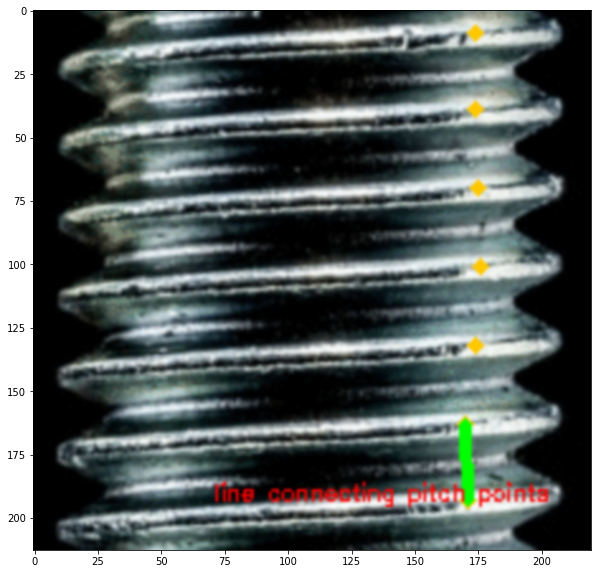

In [39]:
#finding the contour in the preprocessed image
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
x=[]
y=[]
for c in contours:
  #filtering contours on basis of area of contour, as the preprocessing technique may not be able to remove some noises
  cv2.contourArea(c)
  area = cv2.contourArea(c)
  if area<90:
	# compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    x.append(cX)
    y.append(cY)
    # draw the centre point in detected line on the image
    cv2.circle(image, (cX, cY), 1, (255, 200, 0), 3)
#drawing line connecting two consecutive centre point on the image
cv2.line(image, (x[0],y[0]), (x[1],y[1]), (0, 255, 0), thickness=3, lineType=8)
#Displaying text
cv2.putText(image, "line connecting pitch points", (x[0] -100, y[0] ),
		cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0, 0), 1)
plt.figure(figsize=(10,10))
#displaying image after interpolating
plt.imshow(image,interpolation='bicubic')
plt.show()
#print(x,y)
y.sort()

#Extracting pitch value from the centre points

In [40]:
#sorting of value on x axis, so that we get the information about consecutive points
x.sort()
for i in range(6):
  print(y[1+i]-y[i])
y_final=y[1]-y[0]
#calculating total number of pixel in image, for converting measurement from camera coordinate to real world dimesnion 
reso=220*213
#calculating total area under the image in real world coordinates
area=80*60
#calulating factor of conversion for final mapping from camera to real world measurement system
factor=area/reso
print(factor)
print("HERE GIVEN RESOLUTION IS 2048*1365\n")
print("Here the exact thread diameter is based on camera resolution/ inch, which has to be calucalted and multiplied by number of pixel as shown above")
print("So final pitch is ",factor*y_final,' milimetre')

30
31
31
31
31
30
0.10243277848911651
HERE GIVEN RESOLUTION IS 2048*1365

Here the exact thread diameter is based on camera resolution/ inch, which has to be calucalted and multiplied by number of pixel as shown above
So final pitch is  3.0729833546734953  milimetre


#CODE ENDS